In [43]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [44]:
ORIGINAL_FPS = 30
MANUAL_FPSS = ['3', '5', '10', '15', '30']
USE_MANUAL_FPSS = True
THRESHOLD = 0.75

In [45]:
def round_floats_to_sigfigs(input_list, sigfigs):
		return [round(number, sigfigs) for number in input_list]

In [46]:
def load_json(filepath):
		with open(filepath, 'r') as file:
				data = json.load(file)
		
		return data

In [47]:
def extract_fpss(metric_list):
		return list(metric_list[list(metric_list.keys())[0]][0]['metric'].keys())

In [48]:
def extract_metric_list(metric_list, fpss, feature='F1'):
		result_column = {}
		
		for fps in fpss: 
				result_column[fps] = [clip_metric['metric'][fps][feature] for clip_metric in metric_list]
		
		return result_column

In [49]:
def cumulative_sum_list(input_list):
		result = []
		total = 0
		for item in input_list:
				total += item
				result.append(total)
		return result

def extract_metric_time(metric_list):
		frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
		time_list = cumulative_sum_list(frame_number_list)
		time_list = list(np.array(time_list) - time_list[0])
		scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

		return round_floats_to_sigfigs(scaled_time_list, 0)

In [50]:
colors = [
		'#e6194B',
		'#f58231',
		'#9A6324',
		'#911eb4',
		'#3cb44b',
		'#f032e6',
		'#4363d8',
]

In [51]:
def plot_mutiple_lines(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, label_size=28, font_size=32, legend_size=20):
		fig, ax1 = plt.subplots(figsize=(12, 6))
		
		if use_MANUAL_FPSS:
				fpss = MANUAL_FPSS
		else:
				fpss = list(yss.keys())

		for i in range(len(fpss)):
				fps = fpss[i]
				ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")

		ax1.set_xlabel(x_label, fontsize=font_size)
		ax1.set_ylabel(y_label, fontsize=font_size)
		ax1.set_title(title, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)
		plt.legend(fontsize=legend_size)
		plt.grid(True)

		plt.show()

In [52]:
def plot_mutiple_lines_horizontal(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, line_y = 0.75, label_size=28, font_size=32, legend_size=16, line_width=3):
		fig, ax1 = plt.subplots(figsize=(12, 6))
		
		if use_MANUAL_FPSS:
				fpss = MANUAL_FPSS
		else:
				fpss = list(yss.keys())

		for i in range(len(fpss)):
				fps = fpss[i]
				ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")
		
		ax1.axhline(y=line_y, color='grey', linestyle='--', linewidth=line_width, label="Required Accuracy")

		ax1.set_xlabel(x_label, fontsize=font_size)
		ax1.set_ylabel(y_label, fontsize=font_size)
		# ax1.set_title(title, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)
		plt.legend(fontsize=legend_size)
		plt.grid(True)

		plt.show()

In [53]:
result_dict_paths = [
		'../assets/result/accuracy/Video1_Result.json',
		'../assets/result/accuracy/Video2_Result.json',
		'../assets/result/accuracy/Video3_Result.json',
		'../assets/result/accuracy/Video4_Result.json',
]

In [54]:
# for result_dict_path in result_dict_paths:
#     result_dict = load_json(result_dict_path)
#     fpss = extract_fpss(result_dict)

#     for class_idx in list(result_dict.keys()):
#         accuracy = extract_metric_list(result_dict[class_idx], fpss)
#         time = extract_metric_time(result_dict[class_idx])
#         plot_mutiple_lines(time, accuracy, 'Time (S)', 'F1', 'F1 at Different FPS', USE_MANUAL_FPSS)

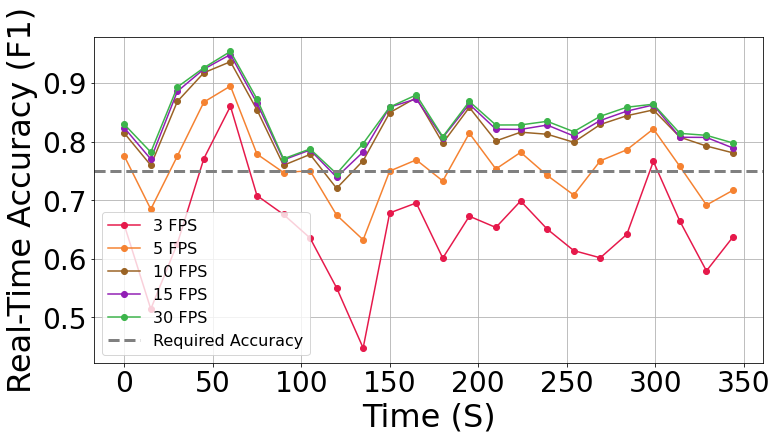

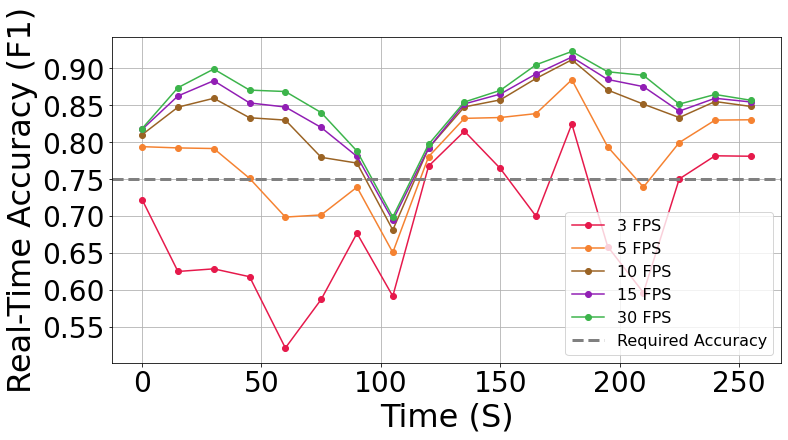

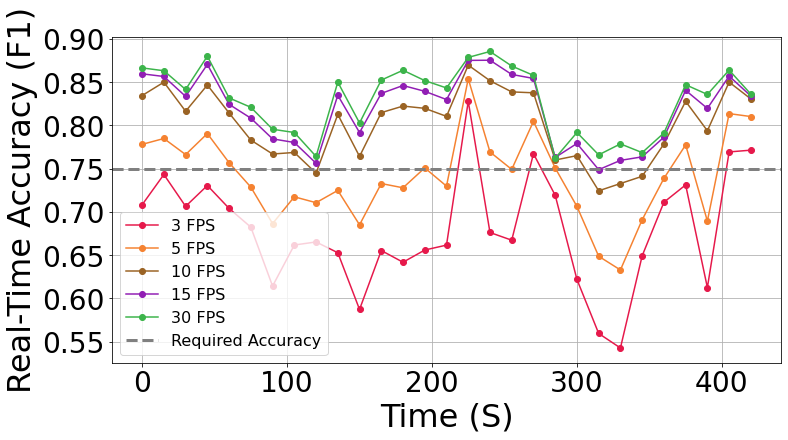

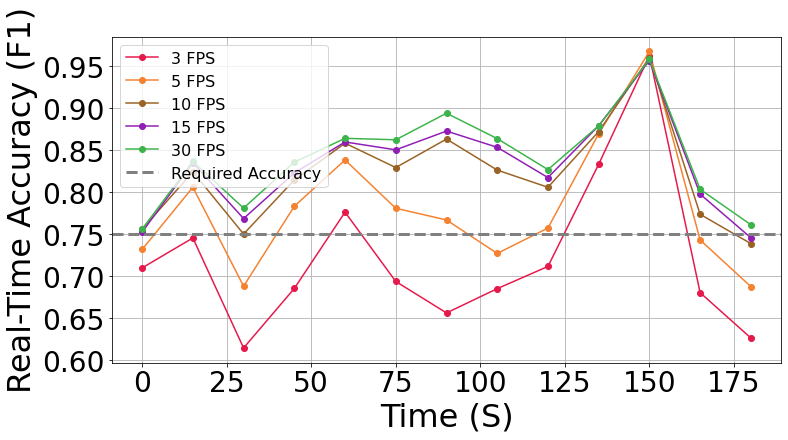

In [55]:
for result_dict_path in result_dict_paths:
		result_dict = load_json(result_dict_path)
		fpss = extract_fpss(result_dict)

		for class_idx in list(result_dict.keys()):
				accuracy = extract_metric_list(result_dict[class_idx], fpss)
				time = extract_metric_time(result_dict[class_idx])
				plot_mutiple_lines_horizontal(time, accuracy, 'Time (S)', 'Real-Time Accuracy (F1)', 'F1 at Different FPS', USE_MANUAL_FPSS, THRESHOLD)

In [56]:
def find_max_index(string_list):
		# Convert each element to integer
		int_list = [int(element) for element in string_list]
		
		# Find index of maximum integer value
		max_index, max_value = max(enumerate(int_list), key=lambda x: x[1])
		
		return max_value

In [57]:
def extract_cheapest_fps(accuracy_dict, fpss, threshold=0.75, use_MANUAL_FPSS=False):
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = fpss
				
	max_fps = find_max_index(fpss)
	
	cheapest_fpss = []
	for i in range(len(accuracy_dict[fpss[0]])):
		curr_fps = max_fps
		for fps in fpss:
			if accuracy_dict[fps][i] >= threshold and int(fps) < int(curr_fps):
				curr_fps = fps
		
		cheapest_fpss.append(int(curr_fps))
	
	return cheapest_fpss

In [58]:
def duplicate_elements_accuracy(input_list):
		result = []
		for item in input_list:
				result.append(item)
				result.append(item)
		return result

In [59]:
def duplicate_elements_time(input_list):
		result = [0]
		for item in input_list:
				if item == input_list[-1]:
						result.append(item)
						break
				result.append(item)
				result.append(item)
		return result

def cumulative_sum_list(input_list):
		result = []
		total = 0
		for item in input_list:
				total += item
				result.append(total)
		return result

def extract_metric_time_horizontal(metric_list):
		frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
		time_list = cumulative_sum_list(frame_number_list)
		time_list = duplicate_elements_time(time_list)
		scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

		return round_floats_to_sigfigs(scaled_time_list, 0)

In [60]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(12, 6))
	
	ax1.plot(xs, ys, color='black', label="Minimum Required FPS")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

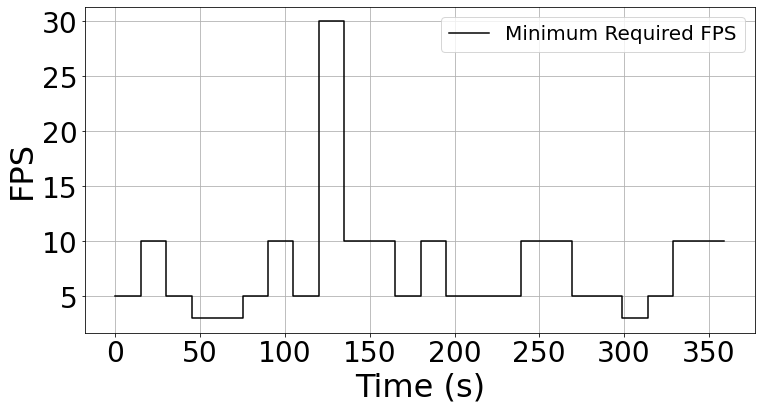

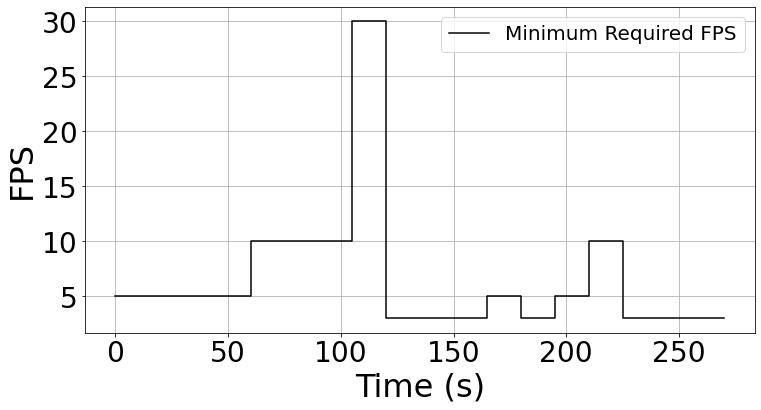

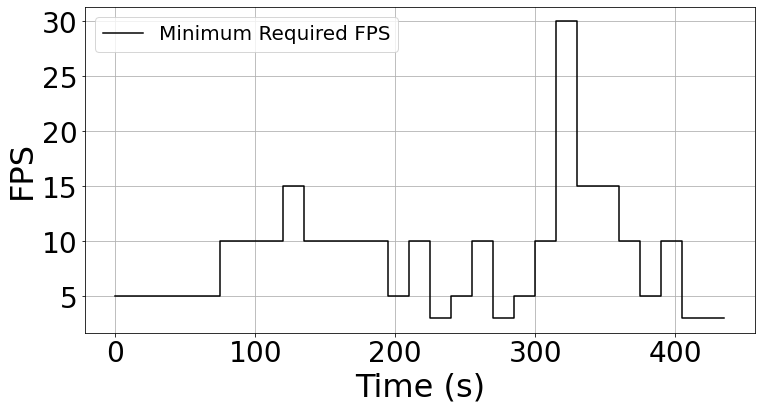

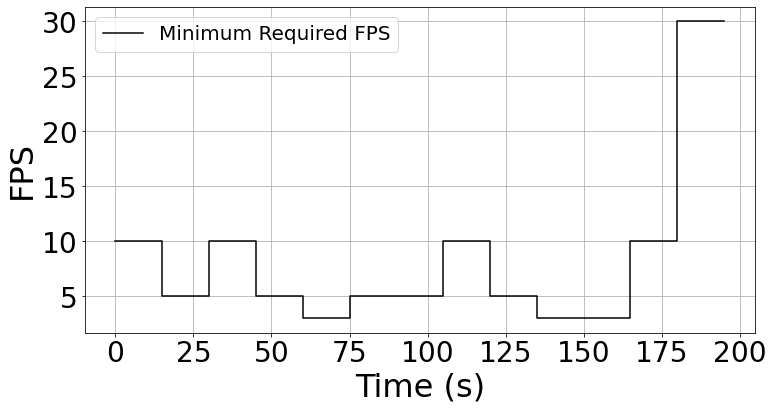

In [61]:
for result_dict_path in result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict)

	for class_idx in list(result_dict.keys()):
		accuracy = extract_metric_list(result_dict[class_idx], fpss)
		cheapest_fps = extract_cheapest_fps(accuracy, fpss, THRESHOLD, USE_MANUAL_FPSS)
		duplicated_cheapest_fps = duplicate_elements_accuracy(cheapest_fps)
		duplicated_time = extract_metric_time_horizontal(result_dict[class_idx])

		plot_one_line(duplicated_time, duplicated_cheapest_fps, 'Time (s)', 'FPS', 'Cheapest FPS Satisfying Required Accuracy')

In [62]:
combined_fps = []
for result_dict_path in result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict)

	for class_idx in list(result_dict.keys()):
		accuracy = extract_metric_list(result_dict[class_idx], fpss)
		cheapest_fps = extract_cheapest_fps(accuracy, fpss, THRESHOLD, USE_MANUAL_FPSS)
		duplicated_cheapest_fps = duplicate_elements_accuracy(cheapest_fps)
		duplicated_time = extract_metric_time_horizontal(result_dict[class_idx])

		combined_fps.extend(cheapest_fps)

In [63]:
with open("../assets/result/accuracy/Combined-FPS" + ".json", 'w') as file:
    json.dump(combined_fps, file, indent=4)